# <font color='cyan'> PROJECT </font>

### <font color='YELLOW'> PREDICT THE FLIGHT TICKET PRICE </font>

#### Importing dataset

In [1]:
import IPython
import numpy as np
import pandas as pd
import wave
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib as mpl
from sklearn.feature_selection import SelectKBest

In [2]:
df = pd.read_excel(r"Dataset.xlsx")


In [3]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [6]:
df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
df.shape

(10683, 11)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
# mean_value=df['Total_Stops'].mean()

In [10]:
# df['Total_Stops'].fillna(value=mean_value, inplace=True)

In [11]:
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
#From description we can see that Date_of_Journey is a object data type,\ Therefore, 
# we have to convert this datatype into timestamp so as to use this column properly for prediction.   
# For this we require pandas to_datetime to convert object data type to datetime dtype.

# Extracting Day
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
# Extracting month
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [14]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [15]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [16]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [17]:
# Time taken by plane to reach destination is called Duration
# It is the differnce between Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [18]:
# Adding duration_hours and duration_mins list to df dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [19]:
df.drop(["Duration"], axis = 1, inplace = True)

In [20]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** - data are not in any order - **OneHotEncoder** is used in this case<br>
**Ordinal data** - data are in order - **LabelEncoder** is used in this case

#### OneHotEncoder

In [21]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

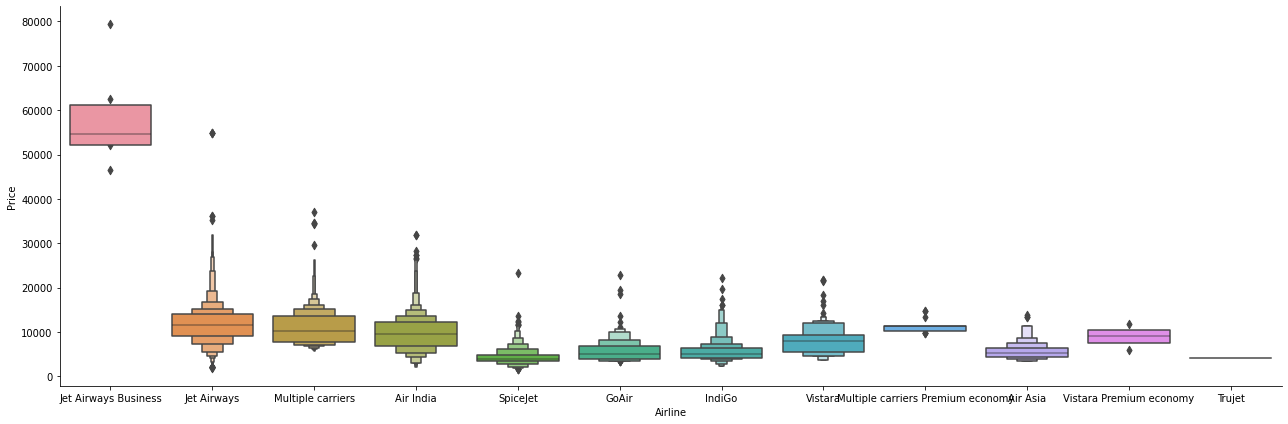

In [22]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [23]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [24]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

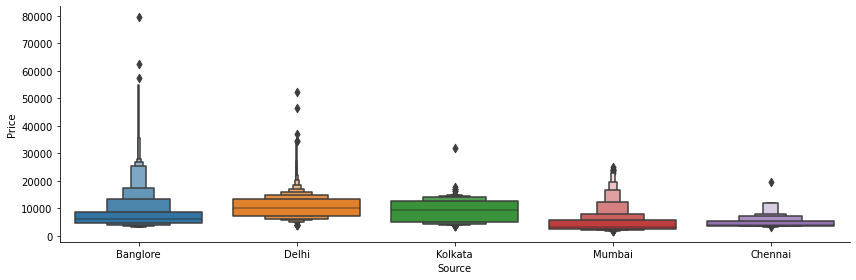

In [25]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [26]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [27]:
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [28]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [29]:

# Route and Total_Stops are related to each other

df.drop(["Route"], axis = 1, inplace = True)

In [30]:
np.unique(df['Additional_Info'] , return_counts= True)

(array(['1 Long layover', '1 Short layover', '2 Long layover',
        'Business class', 'Change airports', 'In-flight meal not included',
        'No Info', 'No check-in baggage included', 'No info',
        'Red-eye flight'], dtype=object),
 array([  19,    1,    1,    4,    7, 1982,    3,  320, 8344,    1],
       dtype=int64))

In [31]:
m = df[df['Additional_Info']=='No check-in baggage included'].index
n = df[df['Additional_Info']=='In-flight meal not included'].index

arr1 = np.ones(len(df))
for indexes in m:
    arr1[indexes] = 0
df['No check-in baggage included'] = arr1



arr2 = np.ones(len(df))
for indexes in n:
    arr2[indexes] = 0
df['In-flight meal not included'] = arr2
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,No check-in baggage included,In-flight meal not included
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50,1.0,1.0
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,7,25,1.0,1.0
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,19,0,1.0,1.0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,5,25,1.0,1.0
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35,4,45,1.0,1.0


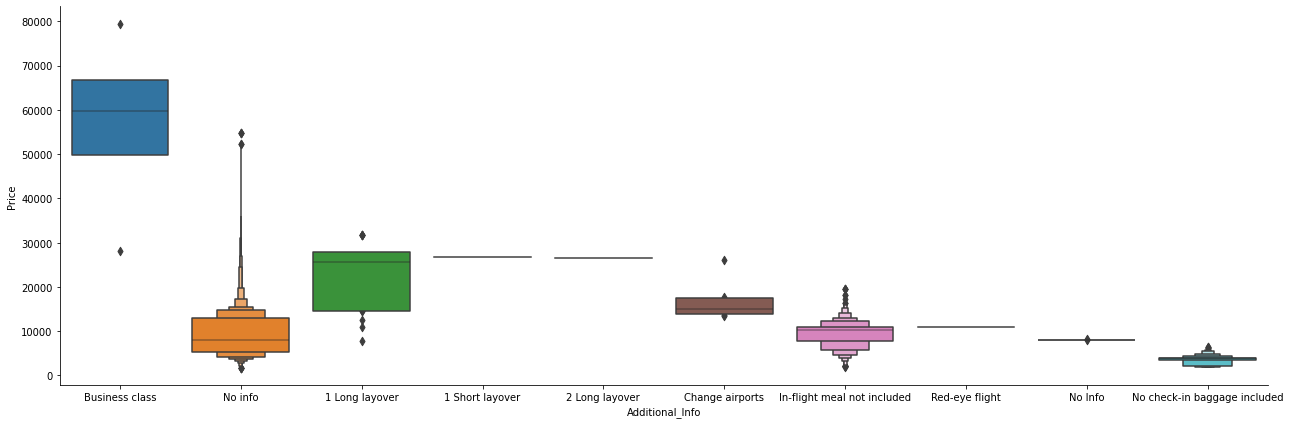

In [32]:
sns.catplot(y = "Price", x = "Additional_Info", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [33]:
df = df.drop(['Additional_Info'], axis =1)

In [34]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

#### LabelEncoder

In [35]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [36]:
data = df
data

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,No check-in baggage included,In-flight meal not included
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,1.0,1.0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1.0,1.0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,1.0,1.0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,1.0,1.0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30,0.0,1.0
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35,1.0,1.0
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0,1.0,1.0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40,1.0,1.0


In [37]:
# sns.pairplot(data=df, hue = 'Price')
# plt.savefig("pne.png")

In [38]:
# Concatenate dataframe: train_data + Airline + Source + Destination

df = pd.concat([df, Airline, Source, Destination], axis = 1)

In [39]:
df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [40]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [41]:
df.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'No check-in baggage included',
       'In-flight meal not included', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

#### Feature Selection

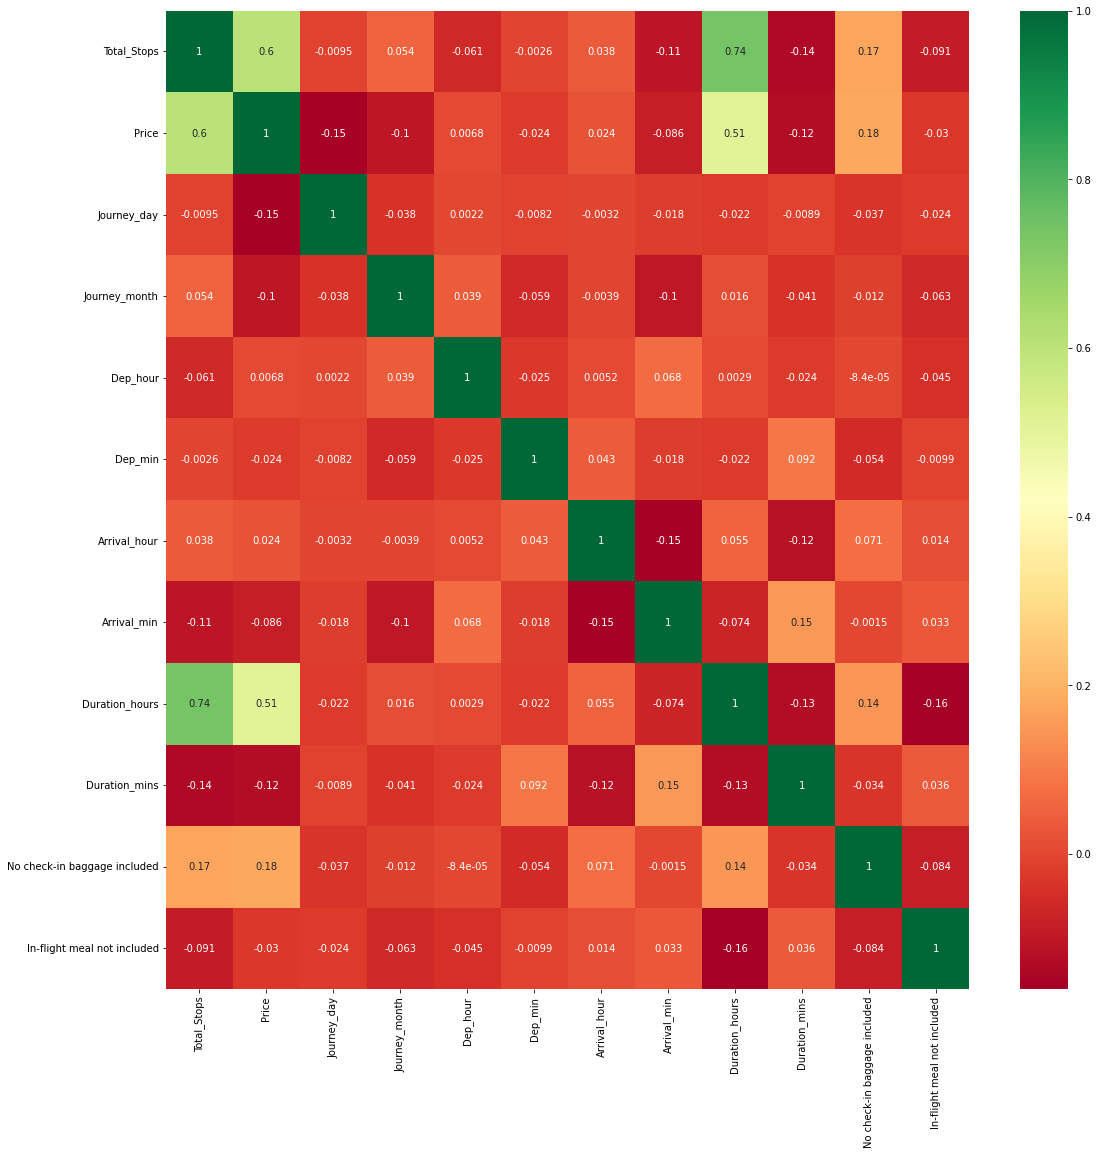

In [42]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [43]:
y = df.Price
X = df.drop(['Price'], axis =1)

In [44]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

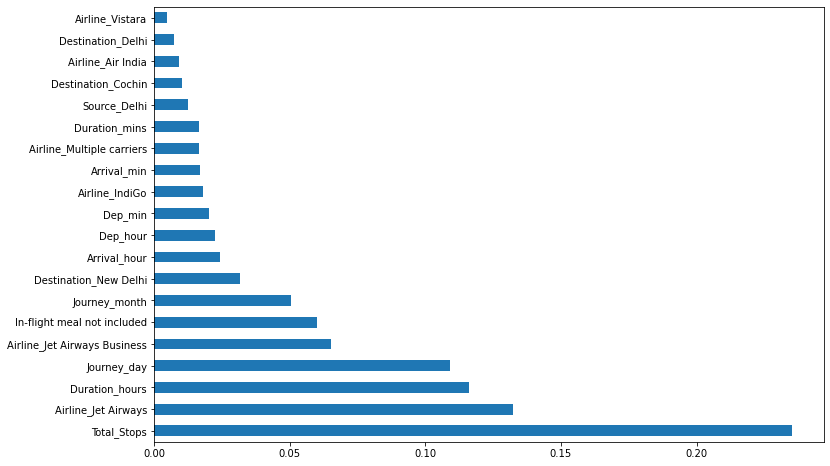

In [45]:
 #plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                10682 non-null  int64  
 1   Price                                      10682 non-null  int64  
 2   Journey_day                                10682 non-null  int64  
 3   Journey_month                              10682 non-null  int64  
 4   Dep_hour                                   10682 non-null  int64  
 5   Dep_min                                    10682 non-null  int64  
 6   Arrival_hour                               10682 non-null  int64  
 7   Arrival_min                                10682 non-null  int64  
 8   Duration_hours                             10682 non-null  int64  
 9   Duration_mins                              10682 non-null  int64  
 10  No check-in baggage in

In [47]:
y = df.Price
X = df.drop(['Price'], axis =1)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [49]:
X_train.shape , X_test.shape

((7477, 31), (3205, 31))

### Model Fitting : RandomForestRegressor

In [50]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
y_pred = reg_rf.predict(X_test)

In [52]:
reg_rf.score(X_train, y_train) #R^2 score

0.9770633013293992

In [53]:
reg_rf.score(X_test, y_test) #R^2 score

0.8620968227604909

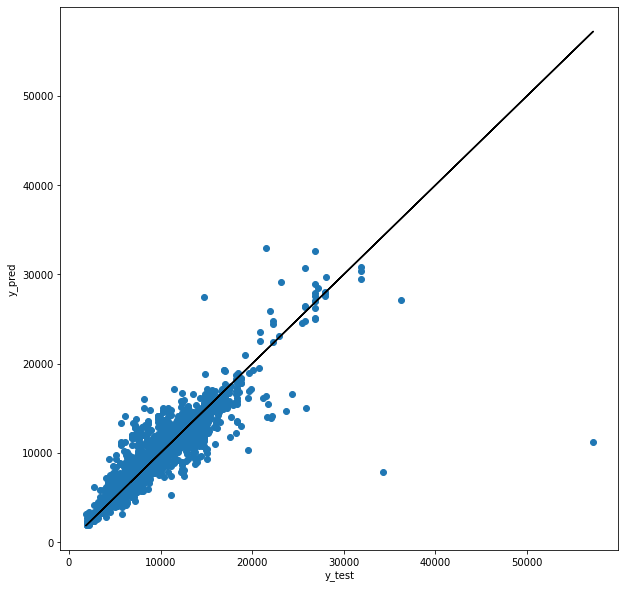

In [54]:
plt.figure(figsize= (10,10))
plt.scatter(y_test, y_pred)
plt.plot(y_test , y_test , c='black')
plt.xlabel("y_test")
plt.ylabel("y_pred")

plt.show()


In [55]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 804.3463478047694
MSE: 2813352.593918533
RMSE: 1677.3051582578923


### Model Fitting : XgBoost

In [56]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor( n_estimators=200, max_depth= 5  )

In [57]:
xg_reg.fit(X_train,y_train)

y_pred2 = xg_reg.predict(X_test)

In [58]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred2))
print("RMSE: %f" % (rmse))

RMSE: 1472.988612


In [59]:
y_pred2.shape , y_test.shape

((3205,), (3205,))

In [60]:
xg_reg.score(X_train, y_train)

0.963060144809135

In [61]:
xg_reg.score(X_test, y_test)

0.8936472104393411

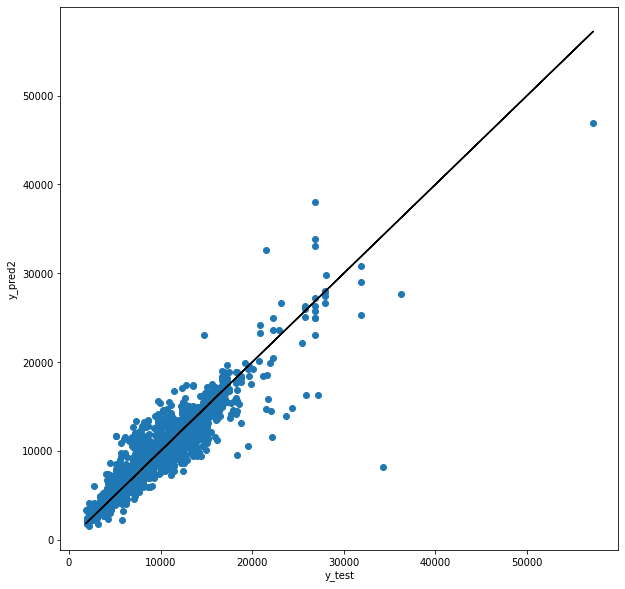

In [62]:
plt.figure(figsize= (10,10))
plt.scatter(y_test, y_pred2)
plt.plot(y_test , y_test , c='black')
plt.xlabel("y_test")
plt.ylabel("y_pred2")

plt.show()

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 866.5499163218482
MSE: 2169695.4513331465
RMSE: 1472.988612085357


### Model Fitting : LightGBM Regressor


In [106]:
import lightgbm as lgb
lgbm = lgb.LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [107]:
y_pred3 = xg_reg.predict(X_test)

In [108]:
from sklearn.metrics import mean_squared_error
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred3))
print("RMSE: %f" % (rmse_2))

RMSE: 1472.988612


In [109]:
lgbm.score(X_train, y_train)

0.8992678740590899

In [110]:
lgbm.score(X_test, y_test)

0.8641622806709836

In [111]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 866.5499163218482
MSE: 2169695.4513331465
RMSE: 1472.988612085357


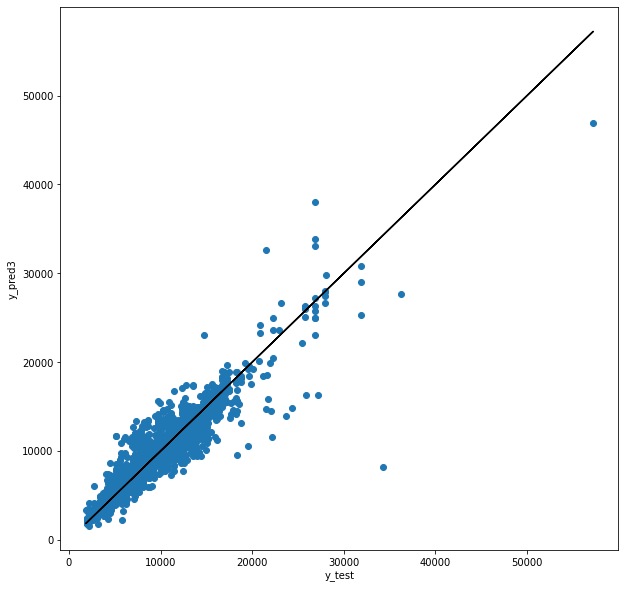

In [112]:
plt.figure(figsize= (10,10))
plt.scatter(y_test, y_pred3)
plt.plot(y_test , y_test , c='black')
plt.xlabel("y_test")
plt.ylabel("y_pred3")

plt.show()